In [9]:
from PIL import Image

from fdray import (
    Background,
    Box,
    Camera,
    Color,
    Include,
    LightSource,
    Normal,
    NormalMap,
    Renderer,
    Scene,
    SlopeMap,
)


In [2]:
def scene(*attrs) -> Scene:
    camera = Camera(90, 70, view_scale=1.2, look_at=(0.5, 1, 0))
    return Scene(
        Include("colors.inc", "textures.inc"),
        camera,
        LightSource(camera.location, "white"),
        Background("white", alpha=0.1),
        Box((0, 0, 0), (1, 2, 0.1), *attrs),
    )


def render(*attrs) -> Image.Image:
    renderer = Renderer(width=300, height=300)
    array = renderer.render(scene(*attrs))
    return Image.fromarray(array)

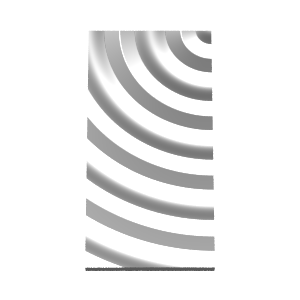

In [3]:
n = Normal("wood", SlopeMap((0, (0, 0)), (0.5, (1, 1)), (0.5, (1, -1)), (1, (0, -1))))
render("texture {Chrome_Metal}", n.scale(0.5))

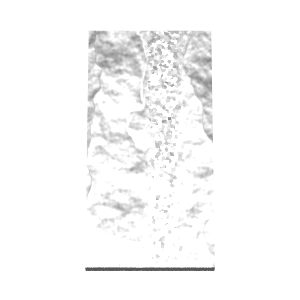

In [14]:
a = Normal("marble", turbulence=0.4)
b = Normal("facets", coords=0.3, scale=0.3)
n = Normal("gradient x", NormalMap((0.2, a), (0.4, b), (0.6, b), (0.7, a)))
render("texture {Chrome_Metal}", n.scale(0.8))